<a href="https://colab.research.google.com/github/allicodi/bsta001_final/blob/main/BSTA_001_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import datetime

Mounted at /content/drive


In [2]:
caseData = pd.read_csv('https://covidtracking.com/data/download/all-states-history.csv')

In [3]:
policyData_raw = pd.read_csv('/content/drive/My Drive/BSTA001/covid_policy_data_11_3_2020.csv') #NOTE NORA - I had to change this to match my drive, you'll have to change back next time you run
# /content/drive/My Drive/BSTA001/covid_policy_data_11_3_2020.csv #for alli
# C:/Users/noraaabbott/Desktop/COVID-19_policy.csv # for nora
policyData = policyData_raw[4:55] #the postcodes (state Abbrev) are not alphabetical

In [ ]:
policyData.head()

,STATE,POSTCODE,FIPS,STEMERG,CLSCHOOL,CLDAYCR,OPNCLDCR,CLNURSHM,STAYHOME,STAYHOMENOGP,END_STHM,CLBSNS,END_BSNS,RELIGEX,FM_ALL,FMFINE,FMCITE,FMNOENF,FM_EMP,FM_END,FM_STP,ALCOPEN,ALCREST,ALCDELIV,GUNOPEN,CLREST,ENDREST,RSTOUTDR,CLGYM,ENDGYM,CLMOVIE,END_MOV,CLOSEBAR,END_BRS,END_HAIR,END_RELG,ENDRETL,BCLBAR2,CLBAR2,CLMV2,...,UICLDCR,UIEXTND,UIMAXAMT,UIMAXEXT,UIMAXDUR,UIMAXCAR,UIMINBP,UIQTRNEED,UIOUTHQBP,UIREQBPL2Q,UIBPEARN300,UITAXWA,UIMINTAXR,UIMAXTAXR,UIAVGBFTAUG,LMABRN,TLHlBUPR,EXTOPFL,HMDLVOP,TLHLCL24,EXCEMORP,WVDEAREQ,PDSKLV,MEDEXP,POPDEN18,POP18,SQML,HMLS19,UNEMP18,POV18,RISKCOV,DEATH18,MH19,VBMEXC,VBMSIG,VBMPERM,VBMAUTOBAL,VBMAUTOAP,VBMGENELEC,Unnamed: 162
4,Alabama,AL,1,3/13/2020,3/20/2020,3/20/2020,5/23/2020,3/19/2020,4/4/2020,0,4/30/2020,3/28/2020,4/30/2020,0,7/16/2020,0,0,1,5/11/2020,0,0,1,3/24/2020,3/24/2020,1,3/19/2020,5/11/2020,0,3/28/2020,5/11/2020,3/28/2020,5/22/2020,3/19/2020,5/11/2020,5/11/2020,5/11/2020,4/30/2020,0,0,0,...,0,0,275,875,20,39,2340,2,780,0,Max Benefit < $300,8000,0.65,6.8,$250.77,1,0,0,0,3/20/2020,0,0,0,0,93.24,4887871,52420,"3,261",5.6,16.8,43.1,"54,352",100.7,0,1,0,0,0,10/29/2020,NaN
5,Alaska,AK,2,3/11/2020,3/16/2020,0,0,0,3/28/2020,0,4/24/2020,3/24/2020,4/24/2020,0,4/24/2020,1,1,0,4/24/2020,5/22/2020,0,1,3/17/2020,3/17/2020,1,3/18/2020,4/24/2020,0,3/18/2020,5/8/2020,3/18/2020,5/8/2020,3/18/2020,5/8/2020,4/24/2020,5/8/2020,4/24/2020,0,0,0,...,1,0,370,970,26,39,2500,2,250,0,13636.36,41500,1,5.4,$443.23,1,0,0,0,0,0,0,0,1,1.11,737438,665384,"1,907",6.8,10.9,32.8,"4,453",429.9,0,1,0,0,2,10/24/2020,NaN
6,Arizona,AZ,4,3/11/2020,3/16/2020,0,0,0,3/31/2020,0,5/16/2020,3/31/2020,5/8/2020,1,0,0,0,0,5/8/2020,0,3/30/2020,1,3/19/2020,3/19/2020,1,3/21/2020,5/11/2020,0,3/21/2020,5/13/2020,3/21/2020,5/16/2020,3/21/2020,5/16/2020,5/8/2020,0,5/8/2020,6/29/2020,6/29/2020,6/29/2020,...,1,0,240,840,26,39,7020,2,2340,0,Max Benefit < $300,7000,0.05,12.85,$237.99,0,0,0,0,0,3/11/2020,0,1,1,62.91,7171646,113990,"10,007",5.4,14,39.1,"59,282",132.9,0,0,0,0,0,10/23/2020,NaN
7,Arkansas,AR,5,3/11/2020,3/17/2020,0,0,3/13/2020,0,0,0,4/6/2020,5/4/2020,0,7/20/2020,1,1,0,5/11/2020,0,0,1,3/19/2020,3/19/2020,1,3/20/2020,5/11/2020,0,3/20/2020,5/4/2020,3/20/2020,5/18/2020,3/20/2020,5/19/2020,5/6/2020,0,5/18/2020,0,0,0,...,0,0,451,1051,16,33,2835,2,1,0,31200,7000,0.1,6,$223.84,1,0,0,0,0,0,0,0,1,56.67,3013825,53179,"2,717",4.5,17.2,43.5,"32,336",231.6,0,0,0,0,0,10/27/2020,NaN
8,California,CA,6,3/4/2020,3/23/2020,0,0,0,3/19/2020,0,0,3/19/2020,5/8/2020,0,6/18/2020,0,0,1,5/5/2020,0,0,1,3/19/2020,3/19/2020,0,3/16/2020,5/18/2020,0,3/19/2020,0,3/19/2020,0,3/16/2020,0,8/28/2020,5/25/2020,5/8/2020,0,0,7/13/2020,...,0,0,450,1050,26,39,1125,2,225,0,6900,7000,1.5,6.2,$282.35,0,0,0,0,0,0,0,1,1,241.65,39557045,163695,"151,278",5.5,12.8,33.3,"268,818",356.2,0,0,0,1,0,0,NaN


In [4]:
caseData.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-12-01,AK,A,122.0,122.0,1,NaN,749.0,749.0,155.0,24,NaN,NaN,986794.0,6721,NaN,NaN,978681.0,NaN,21.0,31834.0,NaN,511,0,NaN,NaN,NaN,NaN,38921.0,7165.0,NaN,0,1018628.0,7232,NaN,NaN,NaN,NaN,NaN,0,1018628.0,7232
1,2020-12-01,AL,A,3638.0,3280.0,60,358.0,25610.0,25610.0,1785.0,272,2242.0,NaN,1383805.0,7481,NaN,NaN,NaN,1291.0,NaN,252900.0,210037.0,3376,0,NaN,NaN,NaN,NaN,NaN,161946.0,NaN,0,1593842.0,9495,NaN,NaN,71828.0,NaN,NaN,0,1593842.0,9495
2,2020-12-01,AR,A+,2512.0,2304.0,10,208.0,9021.0,9021.0,1074.0,84,NaN,403.0,1552255.0,6854,NaN,NaN,1552255.0,994.0,195.0,159309.0,139198.0,1950,0,NaN,3300.0,NaN,24423.0,NaN,140682.0,NaN,0,1691453.0,7996,NaN,21856.0,NaN,141607.0,NaN,0,1691453.0,7996
3,2020-12-01,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,1988.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1988.0,0,NaN,NaN,NaN,NaN,NaN,0,1988.0,0
4,2020-12-01,AZ,A+,6687.0,6191.0,48,496.0,26072.0,26072.0,2594.0,286,NaN,597.0,1945076.0,8127,NaN,NaN,NaN,NaN,369.0,337139.0,326838.0,10322,0,NaN,NaN,NaN,NaN,NaN,53026.0,NaN,0,2271914.0,18225,365224.0,NaN,NaN,NaN,2271914.0,18225,NaN,0


In [5]:
caseData['date'] = caseData['date'].astype('datetime64[ns]') #converts date attribute from string type to datetime type to be used for calculations

#gather dates of face mask mandates and their respective states
dateOfFM = policyData.FM_ALL 
stateOfFM = policyData.POSTCODE 

dateOfFM = pd.to_datetime(dateOfFM, errors = 'coerce') #converts date face mask mandate implemented from string type to datetime type to be used for calculations

In [6]:
caseData.info() #look at types and verify datetime conversion worked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15353 entries, 0 to 15352
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              15353 non-null  datetime64[ns]
 1   state                             15353 non-null  object        
 2   dataQualityGrade                  14092 non-null  object        
 3   death                             14527 non-null  float64       
 4   deathConfirmed                    6685 non-null   float64       
 5   deathIncrease                     15353 non-null  int64         
 6   deathProbable                     4969 non-null   float64       
 7   hospitalized                      9244 non-null   float64       
 8   hospitalizedCumulative            9244 non-null   float64       
 9   hospitalizedCurrently             12251 non-null  float64       
 10  hospitalizedIncrease              15353 non-nu

In [8]:
#keeping only necessary columns

dataFinal = caseData[['date', 'state', 'positiveIncrease']]
#dataFinal = caseData.drop(['dataQualityGrade' , 'death' ,	'deathConfirmed', 	'deathIncrease' ,	'deathProbable' ,	'hospitalized'	,'hospitalizedCumulative'	,'hospitalizedCurrently'	,'hospitalizedIncrease'	,'inIcuCumulative'	,'inIcuCurrently'	,'negative'	,'negativeIncrease'	,'negativeTestsAntibody'	,'negativeTestsPeopleAntibody',	'negativeTestsViral',	'onVentilatorCumulative'	,'onVentilatorCurrently'	,'positive'	,'positiveCasesViral', 'positiveScore'	,'positiveTestsAntibody'	,'positiveTestsAntigen'	,'positiveTestsPeopleAntibody'	,'positiveTestsPeopleAntigen'	,'positiveTestsViral'	,'recovered'	,'totalTestEncountersViral'	,'totalTestEncountersViralIncrease'	,'totalTestResults'	,'totalTestResultsIncrease'	,'totalTestsAntibody'	,'totalTestsAntigen'	,'totalTestsPeopleAntibody',	'totalTestsPeopleAntigen'	,'totalTestsPeopleViral'	,'totalTestsPeopleViralIncrease'	,'totalTestsViral'	,'totalTestsViralIncrease'], axis = 1)
dataFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15353 entries, 0 to 15352
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15353 non-null  datetime64[ns]
 1   state             15353 non-null  object        
 2   positiveIncrease  15353 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 360.0+ KB


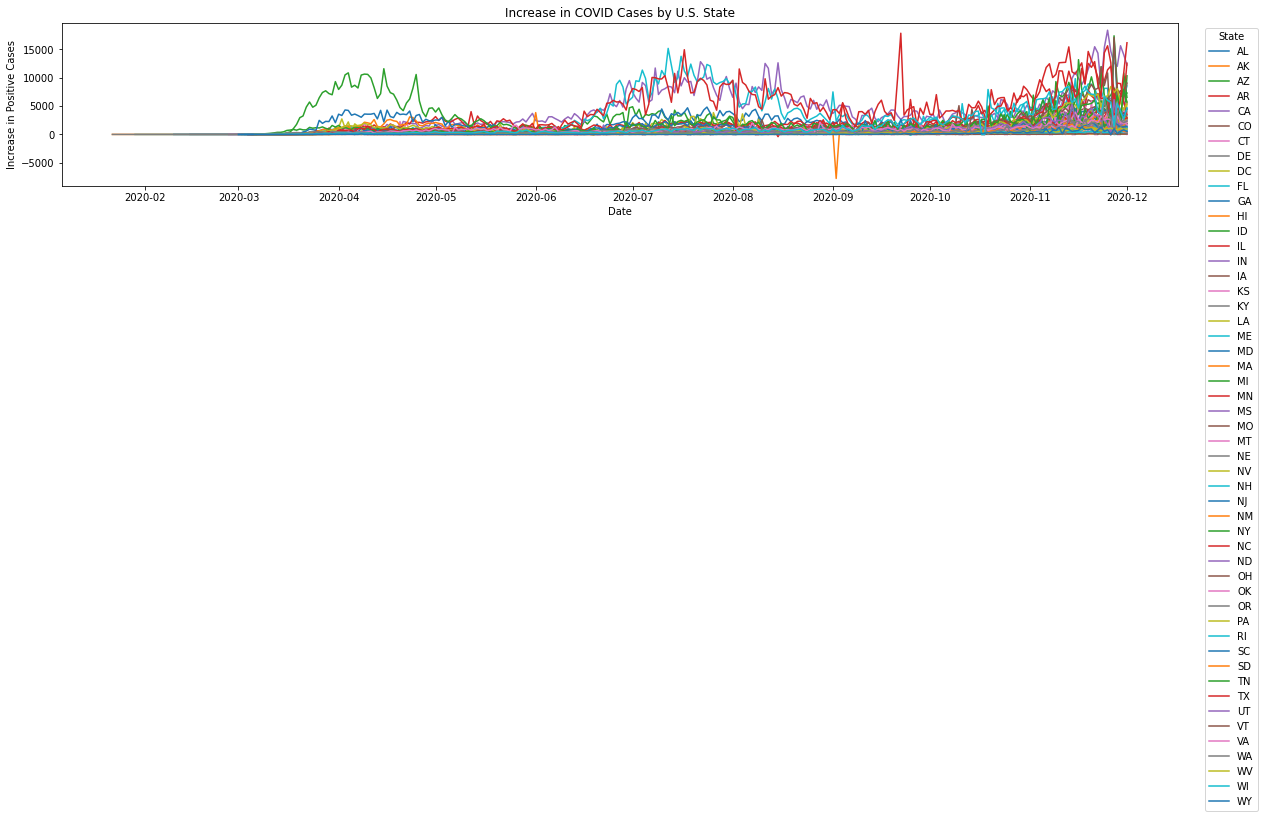

In [11]:
#redid to make code more concise and graph easier to read

#question for prof m - how to change legend so no color repeats (use dashed lines, etc.)

fig, ax = plt.subplots(figsize=(20,3))

casesByState = []

stateAbbrev = policyData.POSTCODE

for state in stateAbbrev: # for loop for separating case data by state
  stateCases = dataFinal.loc[dataFinal['state'] == state] 
  casesByState.append(stateCases)
  #graph of state case increases over time
  x = stateCases.date
  y = stateCases.positiveIncrease
  ax.plot(x, y, label=state)
  
ax.set_title('Increase in COVID Cases by U.S. State')
ax.set_xlabel('Date')
ax.set_ylabel('Increase in Positive Cases')
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), title='State')
plt.show()

In [ ]:
#data needs cleaning, one state has greater than -5000 pos. inc, pretty sure it's NM

In [12]:
FMdf = pd.DataFrame({'FM_ALL':dateOfFM, 'State':stateOfFM}) #making data frame of face mask mandates

for col in FMdf.columns: #checking column titles
  print(col)

print(FMdf)

FM_ALL
State
       FM_ALL State
4  2020-07-16    AL
5  2020-04-24    AK
6         NaT    AZ
7  2020-07-20    AR
8  2020-06-18    CA
9  2020-07-16    CO
10 2020-04-20    CT
11 2020-04-28    DE
12 2020-04-17    DC
13        NaT    FL
14        NaT    GA
15 2020-04-16    HI
16        NaT    ID
17 2020-05-01    IL
18 2020-07-27    IN
19        NaT    IA
20 2020-07-03    KS
21 2020-05-11    KY
22        NaT    LA
23 2020-05-01    ME
24 2020-04-18    MD
25 2020-05-06    MA
26 2020-04-27    MI
27 2020-07-24    MN
28 2020-08-05    MS
29        NaT    MO
30        NaT    MT
31        NaT    NE
32 2020-06-26    NV
33        NaT    NH
34 2020-04-08    NJ
35 2020-05-15    NM
36 2020-04-17    NY
37 2020-06-26    NC
38        NaT    ND
39 2020-07-23    OH
40        NaT    OK
41 2020-07-01    OR
42 2020-07-01    PA
43 2020-04-18    RI
44        NaT    SC
45        NaT    SD
46        NaT    TN
47 2020-07-03    TX
48 2020-04-10    UT
49 2020-08-01    VT
50 2020-05-29    VA
51 2020-06-26    WA
52 2020

In [14]:
beforeDate = []
afterDateBegin = []
afterDateEnd = []

for date in FMdf.FM_ALL:  #calculate two week periods before and after mandate implementation
  beforeDate.append(date - datetime.timedelta(days=14))
  afterDateBegin.append(date + datetime.timedelta(days=14))
  afterDateEnd.append(date + datetime.timedelta(days=28))

  
FMdf['TwoWksBefore'] = beforeDate
FMdf['TwoWksAfter'] = afterDateBegin
FMdf['FourWksAfter'] = afterDateEnd

FMdf.head()  

,FM_ALL,State,TwoWksBefore,TwoWksAfter,FourWksAfter
4,2020-07-16,AL,2020-07-02,2020-07-30,2020-08-13
5,2020-04-24,AK,2020-04-10,2020-05-08,2020-05-22
6,NaT,AZ,NaT,NaT,NaT
7,2020-07-20,AR,2020-07-06,2020-08-03,2020-08-17
8,2020-06-18,CA,2020-06-04,2020-07-02,2020-07-16


In [16]:
avgCasesBefore = []
avgCasesAfter = []

for i in FMdf.index: #cycle through all states and calculate avg increase over time frame
  positiveIncrease = []
  state = FMdf['State'][i] # get state at index
  data = dataFinal.loc[dataFinal['state'] == state] #get policy data associated with state
  
  before = data.loc[(data.date>=FMdf['TwoWksBefore'][i]) & (data.date<=FMdf['FM_ALL'][i]),:].positiveIncrease #data from two week period before policy implemented
  after = data.loc[(data.date >= FMdf['TwoWksAfter'][i]) & (data.date<=FMdf['FourWksAfter'][i]),:].positiveIncrease #data from two week period after policy implemented
  
  avgCasesBefore.append(np.mean(before)) #calc averages
  avgCasesAfter.append(np.mean(after))

FMdf['avgCasesBefore'] = avgCasesBefore #add list of averages to the dataframe
FMdf['avgCasesAfter'] = avgCasesAfter

In [17]:
FMdf.head()

,FM_ALL,State,TwoWksBefore,TwoWksAfter,FourWksAfter,avgCasesBefore,avgCasesAfter
4,2020-07-16,AL,2020-07-02,2020-07-30,2020-08-13,1475.066667,1451.666667
5,2020-04-24,AK,2020-04-10,2020-05-08,2020-05-22,6.933333,2.133333
6,NaT,AZ,NaT,NaT,NaT,NaN,NaN
7,2020-07-20,AR,2020-07-06,2020-08-03,2020-08-17,714.533333,660.266667
8,2020-06-18,CA,2020-06-04,2020-07-02,2020-07-16,2894.133333,8002.600000


In [ ]:
statesWithPolicies = [FMdf['State'][i] for i in FMdf.index if str(FMdf['FM_ALL'][i]) != 'NaT'] #might use this to eliminate states w/o policy from graph below, still have to implement
print(statesWithPolicies)

['AL', 'AK', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'HI', 'IL', 'IN', 'KS', 'KY', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'NV', 'NJ', 'NM', 'NY', 'NC', 'OH', 'OR', 'PA', 'RI', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI']


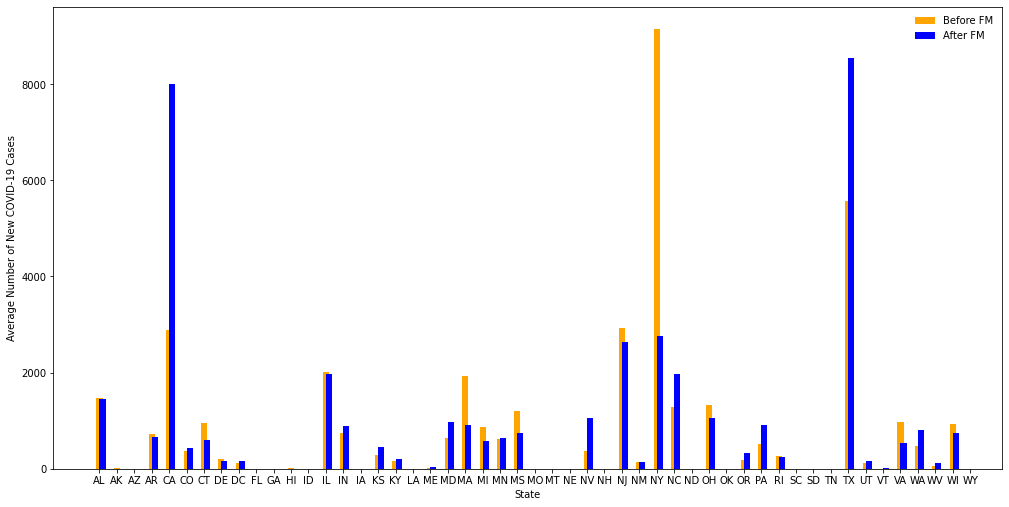

In [19]:
#plot data
from matplotlib.pyplot import figure

width = 0.35  #width of bars

fig, ax = plt.subplots()
rects1 = ax.bar(FMdf.State, FMdf.avgCasesBefore, width, align= 'center', color='orange', label='Before FM')
rects2 = ax.bar(FMdf.State, FMdf.avgCasesAfter, width, align= 'edge', color='blue', label='After FM')
ax.set_ylabel('Average Number of New COVID-19 Cases')
ax.set_xlabel('State')
ax.set_xticklabels(FMdf.State)
ax.legend(frameon=False)
fig.set_size_inches(17, 8.5, forward=True)

**Things to do:**


*   Pick/use statistical test(s)



1.   Hypothesis test for two week period around face mask policy implementation - Paired T-Test

  *   H0 : policy does not impact average increase in cases(after - before = 0 )
  *   H1 : policy decreases average increase in cases (after - before <= 0)

2.    Chi-Squared Test/2x2 Table - states with fines x states with criminal charges (FMFINE vs FMCITE) 
  *   Shows differences in behavior enforcement - is some policy more effective than others?
  *   Treat increase or decrease as 0/1
  *   Fines vs Not fines - states increase vs decrease
  *   Fines vs Citations - states increase vs decrease

3.    Linear regression for behavior vs avg increase in number of cases
  *   X = 0 for citation, X = 1 for fines
  *   Y = average two weeks after

**Future Directions:**
*   Look at other variables w/ dates
    * Bar shutdown, school shutdown, restaurant reopen, religious gatherings limited
    * Bar reopen, school reopen, restaurant reopen, religious gatherings reopen
*   Look at FM related variables
    * FM mandate enforced by fines, FM mandate enforced by criminal charge
    *   List of Face Mask Related Attributes
    * Mandate face mask use by all individuals in public spaces	(date)
    * Face mask mandate enforced by fines	(binary)
    * Face mask mandate enforced by criminal charge/citation	(binary)
    * No legal enforcement of face mask mandate	Mandate face mask use by employees in public-facing businesses	(date)
    * State ended statewide mask use by individuals in public spaces (date)	
    * Attempt by state government to prevent local governments from implementing face mask orders (date)


